<a href="https://colab.research.google.com/github/lblogan14/hands_on_notes/blob/master/Ch7_ensemble_learning_and_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

A group of predictors is called an ensemble; thus, this technique is called *Ensemble Learning*, and an Ensemble Learning algorithm is called an *Ensemble method*.

*Random Forest*,  an ensemble of Decision Trees, each of which is trained on different random subset of the training set, predicting the classes that gets the most votes

#Voting Classifiers
A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This majority-vote classifier is called a *hard voting classifier*.

However, this is only true if all classifiers are perfectly independent, making uncorrelated errors,
which is clearly not the case since they are trained on the same data. They are likely to make the same types of errors, so there will be many majority votes for the wrong class, reducing the ensemble’s accuracy.

Use the tossing biased coins as an example, if we toss this biased coin 10,000 times and perform this experiemnts 10 times...

In [0]:
heads_proba = 0.53
no_bias = 0.5
n_tosses = 10000
coin_tosses = (np.random.rand(n_tosses, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, n_tosses+1).reshape(-1, 1)


In [3]:
coin_tosses.shape, cumulative_heads_ratio.shape

((10000, 10), (10000, 10))

[0, 10000, 0.42, 0.58]

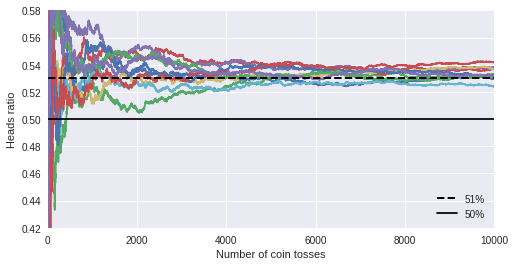

In [4]:
plt.figure(figsize=(8, 4))
plt.plot(cumulative_heads_ratio)
plt.plot([0, n_tosses], [heads_proba, heads_proba], 'k--', linewidth=2, label='51%')
plt.plot([0, n_tosses], [no_bias, no_bias], 'k-', label='50%')
plt.xlabel('Number of coin tosses')
plt.ylabel('Heads ratio')
plt.legend(loc='lower right')
plt.axis([0, 10000, no_bias-0.08, no_bias+0.08])

The example above confirms how ensemble learning works based on the law of large numbers

The ensemble methods work only if all classifiers are perfectly independent, making uncorrelated errors, which is clearly not the case since they are trained on the same data. They are likely to
make the same types of errors, so there will be many majority votes for the wrong class, reducing the ensemble’s accuracy.

Try **VotingClassifier**,

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), 
                  ('rf', rnd_clf),
                  ('svc', svm_clf)],
    voting='hard')

In [7]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [8]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


If all classifiers are able to estimate class probabilities (i.e., they have a **predict_proba()** method), then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. This is called *soft voting*.

In [9]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [10]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#Bagging and Pasting

Another way to use the same training algorithm for every predictor, but to train them on different random subsets of the training set.

*Bagging*, (short for *bootstrap aggregating*): sampling with replacement

*Pasting*, sampling without replacement

In other words, both bagging and pasting allow training instances to be sampled several times across multiple predictors, but only bagging allows training instances to be sampled several times for the same predictor.

##Bagging and Pasting in Scikit-Learn
**BaggingClassifier** or **BaggingRegressor**

To use *bagging*, set **bootstrap=True**,

To use *pasting*, set **bootstrap=False**.

**n_jobs** = number of CPU cores to use. -1 => use all available cores

The **BaggingClassifier** automatically performs soft voting instead of hard voting if the base classifier can estimate class probabilities

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

0.904

We can plot and compare the difference between one dicision tree and an ensemble of 500 trees

In [13]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1, x2 = np.meshgrid(x1s, x2s)
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
  if contour:
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
  
  plt.plot(X[:, 0][y==0], X[:,1][y==0], 'yo', alpha=alpha)
  plt.plot(X[:, 0][y==1], X[:,1][y==1], 'bs', alpha=alpha)
  plt.axis(axes)
  plt.xlabel(r"$x_1$", fontsize=18)
  plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Text(0.5,1,'Decision Trees with Bagging')

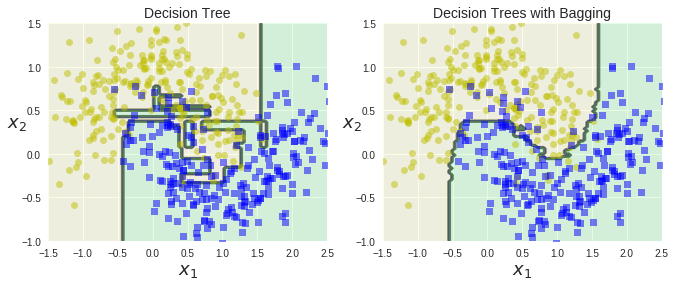

In [15]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)

##Out-of-Bag Evaluation
With bagging, some instances may be sampled several times for any given predictor, while others may not be sampled at all. By default a **BaggingClassifier** samples m training instances with replacement (**bootstrap=True**), where m is the size of the training set. This means that only about 63% of the training instances are sampled on average for each predictor.

The remaining 37% of the training instances that are not sampled are called *out-of-bag* (oob) instances. Note that they are not the same 37% for all predictors. Since a predictor never sees the oob instances during training, it can be evaluated on these instances, without the need for a separate validation set or cross-validation.

**oob_score=True** when creating a **BaggingClassifier** to request an automatic oob evaluation after training.

In [16]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

In [17]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

##Random Patches and Random Subspaces
**max_features** and **bootstrap_features** are for feature sampling,

**max_samples** and **bootstrap** are for instance sampling.

If we use **BaggingClassifier** with the function of feature sampling, each model will be trained on a random subset of the input features. This is useful for high-dimensional inputs, such as images..

*Random Patches method*, sampling both training instances and features.
*Random Subspaces method*, sampling features but keeping all training instances (**bootstrap_features=True** and **max_samples=1.0**, with **bootstrap_features=True** and/or **max_features** smaller than 1.0)

#Random Forests
ensemble of Decision Trees
The Random Forest algorithm introduces extra randomness when growing trees. It searches for the best feature among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model.

In [0]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [0]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

In [20]:
np.sum(y_pred_bag == y_pred_rf) / len(y_pred_rf)

0.992

##Extra-Trees
*Extremely Randomized Trees* ensemble: using random thresholds for each feature rather than searching for the best possible thresholds

check **ExtraTreesClassifier** class

##Feature Importance
Important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all).

**feature_importances_** variable in the **RandomForestClassifier**

If we use this variable on the Iris dataset, we can find out which feature is the most significant feature among all:

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])

for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
  print(name, score)

sepal length (cm) 0.09146974769172603
sepal width (cm) 0.02408829808571213
petal length (cm) 0.43982547521274107
petal width (cm) 0.444616479009821


If we use on the MNIST dataset, we can actually plot the importance of each pixel,

In [22]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

rnd_clf_mnist = RandomForestClassifier(random_state=42)
rnd_clf_mnist.fit(mnist['data'], mnist['target'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
def plot_digit(data):
  image = data.reshape(28, 28)
  plt.imshow(image, cmap=plt.cm.hot, interpolation='nearest')
  plt.axis('off')

[Text(1,0,'Not Important'), Text(1,0,'Very Important')]

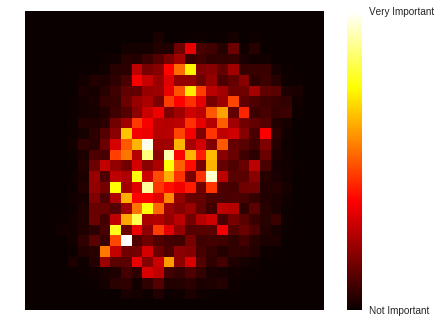

In [24]:
plot_digit(rnd_clf_mnist.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf_mnist.feature_importances_.min(), 
                           rnd_clf_mnist.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not Important', 'Very Important'])

#Boosting
refers to any Ensemble method that can combine several weak learners into a strong learner. 

The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor.

##AdaBoost
A first base classifier (such as a Decision Tree) is trained and used to make predictions on the training set. The relative weight
of misclassified training instances is then increased. A second classifier is trained using the updated weights and again it makes predictions on the training set, weights are updated, and so on.

In [25]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm='SAMME.R', learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
#still using the makemoons data

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

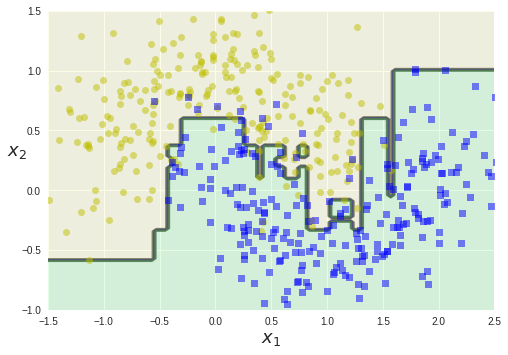

In [26]:
plot_decision_boundary(ada_clf, X, y)

Scikit-Learn actually uses a multiclass version of AdaBoost called ***SAMME*** (which stands for *Stagewise Additive Modeling using a Multiclass Exponential* loss function). When there are just two classes, SAMME is equivalent to AdaBoost.

if the predictors can estimate class probabilities (i.e., if they have a **predict_proba()** method), Scikit-Learn can use a variant of SAMME called **SAMME.R** (the R stands for “Real”), which relies on class probabilities rather than predictions and generally performs better.

To visualize how the decision boundaries of the five consecutive predictors change,

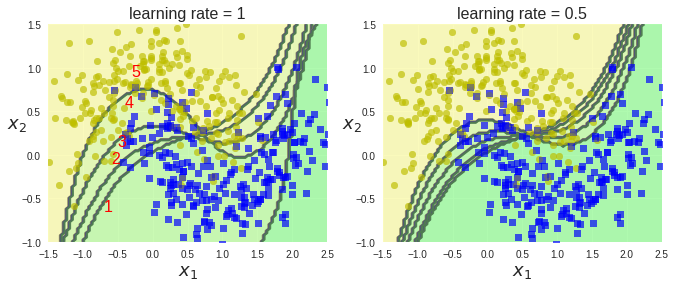

In [27]:
m = len(X_train)
plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    
    for i in range(5):
      svm_clf = SVC(kernel='rbf', C=0.05, random_state=42)
      svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
      y_pred = svm_clf.predict(X_train)
      sample_weights[y_pred != y_train] *= (1 + learning_rate)
      plot_decision_boundary(svm_clf, X, y, alpha=0.2)
      plt.title('learning rate = {}'.format(learning_rate), fontsize=16)
    if subplot == 121:
      plt.text(-0.7, -0.65, "1", fontsize=16, color='r')
      plt.text(-0.6, -0.10, "2", fontsize=16, color='r')
      plt.text(-0.5,  0.10, "3", fontsize=16, color='r')
      plt.text(-0.4,  0.55, "4", fontsize=16, color='r')
      plt.text(-0.3,  0.90, "5", fontsize=16, color='r')



The first classifier gets many instances wrong, so their weights get boosted. The second classifier therefore does a better job on these instances, and so on. The plot on the right represents the same sequence of predictors except that the learning rate is halved.

The sequential learning technique has some similarities with Gradient Descent, except that instead of tweaking a single predictor’s parameters to minimize a cost function, AdaBoost adds predictors to the ensemble, gradually making it better.

Once all predictors are trained, the ensemble makes predictions very much like bagging or pasting, except that predictors have different weights depending on theirnoverall accuracy on the weighted training set.

There is one important drawback to this sequential learning technique: it cannot be parallelized (or only partially), since each predic‐
tor can only be trained after the previous predictor has been trained and evaluated. As a result, it does not scale as well as bagging or pasting.

##Gradient Boosting
works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the *residual errors* made by the previous predictor.

*Gradient Tree Boosting*, or *Gradient Boosted Regression Trees* (GBRT) is to apply Gradient Boosting algorithm using Decision Trees as the base predictors

In [0]:
#Create sample data
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [29]:
from sklearn.tree import DecisionTreeRegressor
#build the first predictor
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [30]:
y2 = y - tree_reg1.predict(X)
#build the second predictor and trained with the misclassified samples (residual)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [31]:
y3 = y2 - tree_reg2.predict(X)
#build the third predictor and trained with the residual of the second predictor
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [32]:
X_new = np.array([[0.4]])
[tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3)]

[array([0.52856846]), array([0.03991297]), array([-0.06852946])]

In [33]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.49995198])

In [0]:
def plot_predictions(regressors, X, y, axes, label=None, style='r-', data_style='b.', data_label=None):
  x1 = np.linspace(axes[0], axes[1], 500)
  y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
  plt.plot(X[:, 0], y, data_style, label=data_label)
  plt.plot(x1, y_pred, style, linewidth=2, label=label)
  
  if label or data_label:
    plt.legend(loc='upper center', fontsize=16)
  plt.axis(axes)

Text(0,0.5,'$y$')

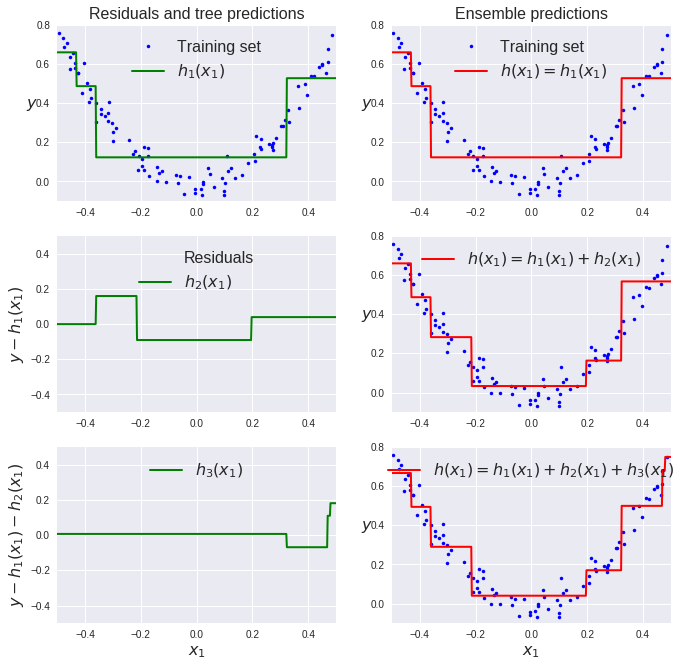

In [36]:
plt.figure(figsize=(11, 11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

In the first row, the ensemble has just one tree, so its predictions are exactly the same as the first tree’s predictions. In the second
row, a new tree is trained on the residual errors of the first tree. On the right you can see that the ensemble’s predictions are equal to the sum of the predictions of the first two trees. Similarly, in the third row another tree is trained on the residual errors of the second tree.

Use **GradientBoostingRegressor**

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [38]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

Text(0.5,1,'learning_rate=0.1, n_estimators=200')

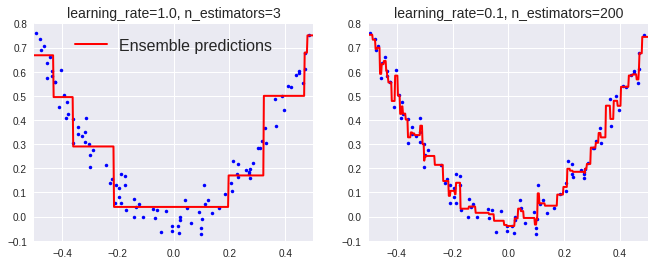

In [39]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

The one on the left does not have enough trees to fit the training set, while the one on the right has too many trees and overfits the training set.

The **learning_rate** hyperparameter scales the contribution of each tree. If you set it to a low value, such as 0.1, you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better. This is a regularization technique called *shrinkage*.

In order to find the optimal number of trees, you can use *early stopping*.

Use **staged_predict()**, which returns an iterator over the predictions made by the ensemble at each stage of training

In [40]:
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
best_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=55, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [0]:
min_error = np.min(errors)

Text(0.5,1,'Best model (55 trees)')

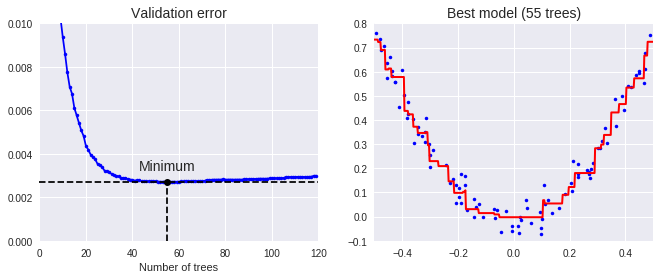

In [44]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, 'b.-')
plt.plot([best_n_estimators, best_n_estimators], [0, min_error], 'k--')
plt.plot([0, 120], [min_error, min_error], 'k--')
plt.plot(best_n_estimators, min_error, 'ko')
plt.text(best_n_estimators, min_error*1.2, 'Minimum', ha='center', fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % best_n_estimators, fontsize=14)

It is also possible to implement early stopping by actually stopping training early(instead of training a large number of trees first and then looking back to find the optimal number), by setting **warm_start=True**, which makes Scikit-Learn keep existing trees when the **fit()** method is called, allowing incremental training.

In [0]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [46]:
print(gbrt.n_estimators)
print('Minimum validation MSE:', min_val_error)

61
Minimum validation MSE: 0.002712853325235463


#XGBoost

In [0]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [48]:
if xgboost is not None:  # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print("Validation MSE:", val_error)

Validation MSE: 0.0028512559726563943


In [49]:
if xgboost is not None:  # not shown in the book
    xgb_reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print("Validation MSE:", val_error)

[0]	validation_0-rmse:0.286719
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.258221
[2]	validation_0-rmse:0.232634
[3]	validation_0-rmse:0.210526
[4]	validation_0-rmse:0.190232
[5]	validation_0-rmse:0.172196
[6]	validation_0-rmse:0.156394
[7]	validation_0-rmse:0.142241
[8]	validation_0-rmse:0.129789
[9]	validation_0-rmse:0.118752
[10]	validation_0-rmse:0.108388
[11]	validation_0-rmse:0.100155
[12]	validation_0-rmse:0.09208
[13]	validation_0-rmse:0.084791
[14]	validation_0-rmse:0.078699
[15]	validation_0-rmse:0.073248
[16]	validation_0-rmse:0.069391
[17]	validation_0-rmse:0.066277
[18]	validation_0-rmse:0.063458
[19]	validation_0-rmse:0.060326
[20]	validation_0-rmse:0.0578
[21]	validation_0-rmse:0.055643
[22]	validation_0-rmse:0.053943
[23]	validation_0-rmse:0.053138
[24]	validation_0-rmse:0.052415
[25]	validation_0-rmse:0.051821
[26]	validation_0-rmse:0.051226
[27]	validation_0-rmse:0.051135
[28]	validation_0-rmse:0.05091
[29]	validation_0-rmse

Compare *XGBoosting* and *Gradient Boosting*

In [50]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None

100 loops, best of 3: 7.7 ms per loop


In [51]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

100 loops, best of 3: 15.9 ms per loop
